In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')    

plt.rcParams['axes.unicode_minus'] = False

In [63]:
pop = pd.read_excel('./data/population_raw_data.xlsx', header=1)
pop.fillna(method='pad', inplace=True)
pop.rename(columns = {'행정구역(동읍면)별(1)':'광역시도',
          '행정구역(동읍면)별(2)':'시도',
           '계':'인구수'}, inplace=True)
pop = pop[(pop['시도'] != '소계')]

pop.rename(columns = {'항목':'구분'}, inplace=True)
pop.loc[pop['구분'] == '총인구수 (명)', '구분'] = '합계'
pop.loc[pop['구분'] == '남자인구수 (명)', '구분'] = '남자'
pop.loc[pop['구분'] == '여자인구수 (명)', '구분'] = '여자'

pop['20-39세'] = pop['20 - 24세'] + pop['25 - 29세'] + \
                    pop['30 - 34세'] + pop['35 - 39세']
pop['65세이상'] = pop['65 - 69세'] + pop['70 - 74세'] + \
                    pop['75 - 79세'] + pop['80 - 84세'] + \
                    pop['85 - 89세'] + pop['90 - 94세'] + \
                    pop['95 - 99세'] + pop['100+']
#pop.head(5)        
pop = pd.pivot_table(pop, index = ['광역시도', '시도'], columns=['구분'], values=['인구수', '20-39세', '65세이상'])
pop['소멸비율'] = pop['20-39세', '여자'] / (pop['65세이상', '합계'] / 2) 
# 1이상 인구 소멸...
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()
pop[pop['소멸위기지역'] == True].index.get_level_values(1)
pop.reset_index(inplace=True)
pop.head()


광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [54]:
#pop.columns.get_level_values(0)
#pop.columns.get_level_values(1)

Index(['', '', '남자', '여자', '합계', '남자', '여자', '합계', '남자', '여자', '합계', '', ''], dtype='object', name='구분')

In [64]:
tmp_columns = [pop.columns.get_level_values(0)[n] + \
               pop.columns.get_level_values(1)[n]
               for n in range(0, len(pop.columns.get_level_values(0)))]
tmp_columns
pop.columns = tmp_columns
pop.head()


,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [66]:
pop.info()
pop['시도'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
광역시도        264 non-null object
시도          264 non-null object
20-39세남자    264 non-null float64
20-39세여자    264 non-null float64
20-39세합계    264 non-null float64
65세이상남자     264 non-null float64
65세이상여자     264 non-null float64
65세이상합계     264 non-null float64
인구수남자       264 non-null float64
인구수여자       264 non-null float64
인구수합계       264 non-null float64
소멸비율        264 non-null float64
소멸위기지역      264 non-null bool
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [111]:
draw_korea_raw = pd.read_excel('./data/draw_korea_raw.xlsx', encoding="EUC-KR")
draw_korea_raw.stack()
draw_korea_raw_statcked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_statcked.reset_index(inplace=True)

In [112]:
draw_korea_raw_statcked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID' }, inplace=True)

In [116]:
draw_korea_raw_statcked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
5,1,4,동두천
6,1,5,연천
7,1,6,포천
8,1,7,의정부
9,1,8,인제


In [117]:
si_name = [None] * len(pop)

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}


for n in pop.index:
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = pop['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
        
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(pop['시도'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]
si_name
pop['ID'] = si_name

#del pop['20-39세남자']
#del pop['65세이상남자']
#del pop['65세이상여자']
pop

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y_x,x_x,y_y,x_y,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11,3,11,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10,0,10,0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11,4,11,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11,5,11,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10,1,10,1,10
5,강원도,양구군,2481.0,6849.0,4108.0,12918.0,11092.0,24010.0,1.207887,False,양구,0,9,0,9,0,9
6,강원도,양양군,2171.0,5087.0,6981.0,13838.0,13380.0,27218.0,0.621974,True,양양,2,10,2,10,2,10
7,강원도,영월군,3134.0,7159.0,9915.0,20652.0,19421.0,40073.0,0.632173,True,영월,7,10,7,10,7,10
8,강원도,원주시,43164.0,88919.0,42246.0,167854.0,170125.0,337979.0,2.043460,False,원주,5,10,5,10,5,10
9,강원도,인제군,3449.0,8961.0,5602.0,17677.0,15043.0,32720.0,1.231346,False,인제,1,8,1,8,1,8


In [125]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))
#pop['ID'].unique()
tmp_list
for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID'] == tmp].index)
    
pop

set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

pop.head()

pop = pd.merge(pop, draw_korea, how='left', on=['ID'])
pop.head()


,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


In [137]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


In [141]:
meddata = pop.pivot_table(index='y', columns='x', values='인구수합계')
masked_metadata = np.ma.masked_where(np.isnan(meddata), meddata)
masked_metadata



masked_array(
  data=[[--, --, --, --, --, --, --, 48013.0, 26264.0, 24010.0, 30114.0,
         --, --, --],
        [--, --, --, 205513.0, 98277.0, 45907.0, 154763.0, 438457.0,
         32720.0, 280707.0, 81793.0, --, --, --],
        [--, --, --, 446233.0, 292612.0, 348220.0, 567581.0, 662154.0,
         70076.0, 45991.0, 27218.0, --, --, --],
        [--, --, 430781.0, 300839.0, 363443.0, 327195.0, 450355.0,
         62448.0, 193763.0, 211101.0, 38718.0, 213846.0, --, --],
        [--, --, 283793.3333333333, 252353.0, 339484.0, 314194.0,
         152737.0, 355069.0, 411005.0, 111367.0, 47070.0, 93297.0, --,
         --],
        [--, 68010.0, 283793.3333333333, 345061.0, 491476.0, 379892.0,
         125249.0, 299259.0, 444168.0, 111563.0, 337979.0, 69599.0, --,
         --],
        [--, 510733.0, 283793.3333333333, 402888.0, 595485.0, 400997.0,
         230241.0, 357215.0, 657831.0, 210359.0, 43318.0, 51738.0, --,
         --],
        [--, 71014.0, 330284.0, 375857.0, 477739.0, 50

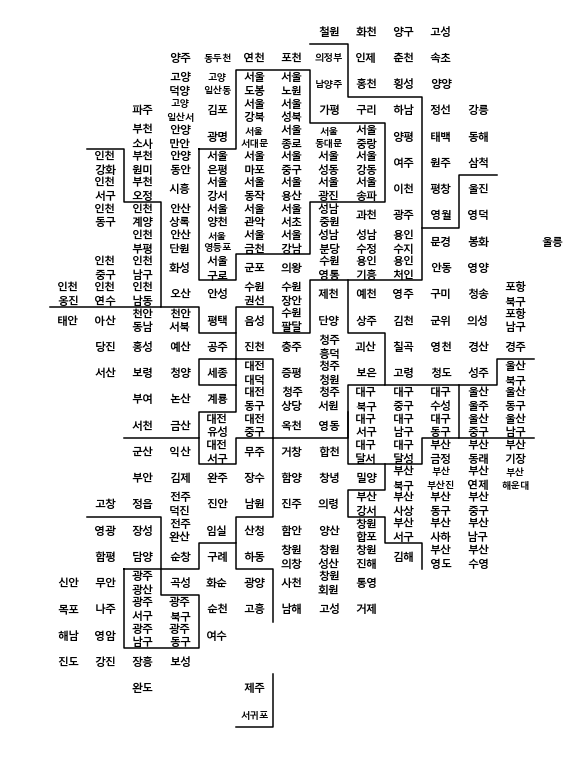

In [142]:
draw_korea = draw_korea_raw_statcked
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]



plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()


plt.show()

In [ ]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()


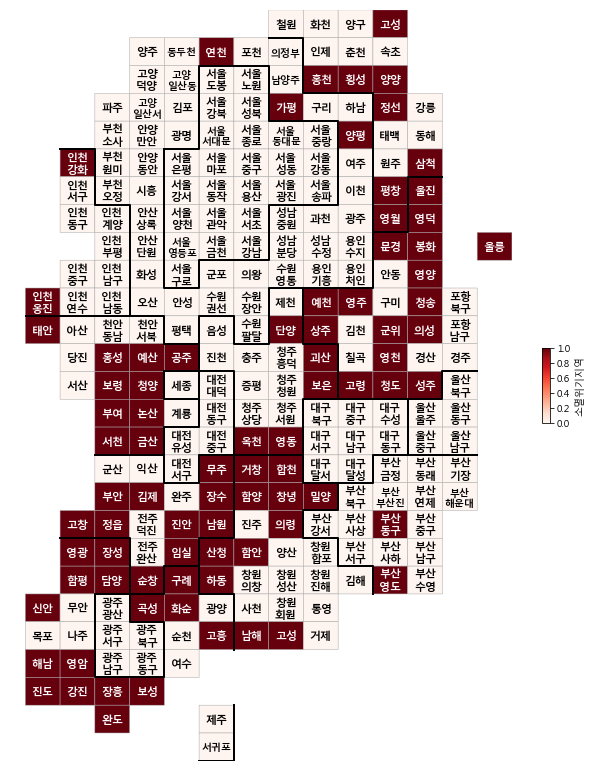

In [150]:
#drawKorea('인구수합계', pop, 'Reds')

pop['소멸위기지역']
pop["소멸위기지역"] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')